In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('PurchasePred.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(537577, 12)

In [4]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00038842',
       'P00295642', 'P00091742'], dtype=object)

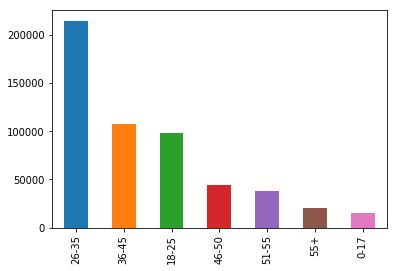

In [5]:
df['Age'].value_counts().plot(kind='bar')

[]

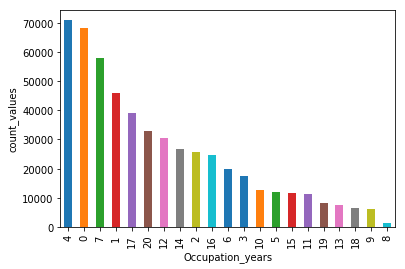

In [6]:
df['Occupation'].value_counts().plot(kind='bar')
plt.xlabel('Occupation_years')
plt.ylabel('count_values')
plt.plot()

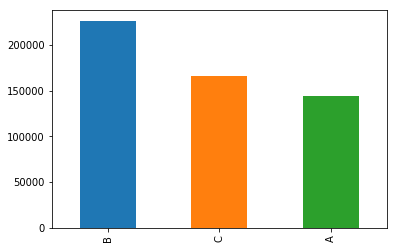

In [7]:
df['City_Category'].value_counts().plot(kind='bar')

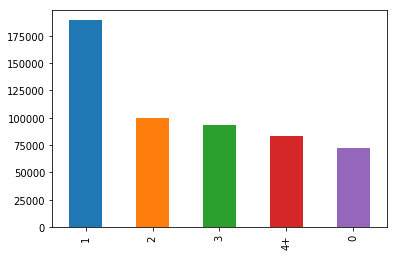

In [8]:
df['Stay_In_Current_City_Years'].value_counts().plot(kind='bar')

In [9]:
df['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [10]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [11]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
df['Gender']= lb.fit_transform(np.array(df['Gender']))
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df['Age']=df['Age'].replace('0-17', '1')
df['Age']=df['Age'].replace('18-25', '2')
df['Age']=df['Age'].replace('26-35', '3')
df['Age']=df['Age'].replace('36-45', '4')
df['Age']=df['Age'].replace('46-50', '5')
df['Age']=df['Age'].replace('51-55', '5')
df['Age']=df['Age'].replace('55+', '6')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [13]:
df['Age'].value_counts()

3    214690
4    107499
2     97634
5     82144
6     20903
1     14707
Name: Age, dtype: int64

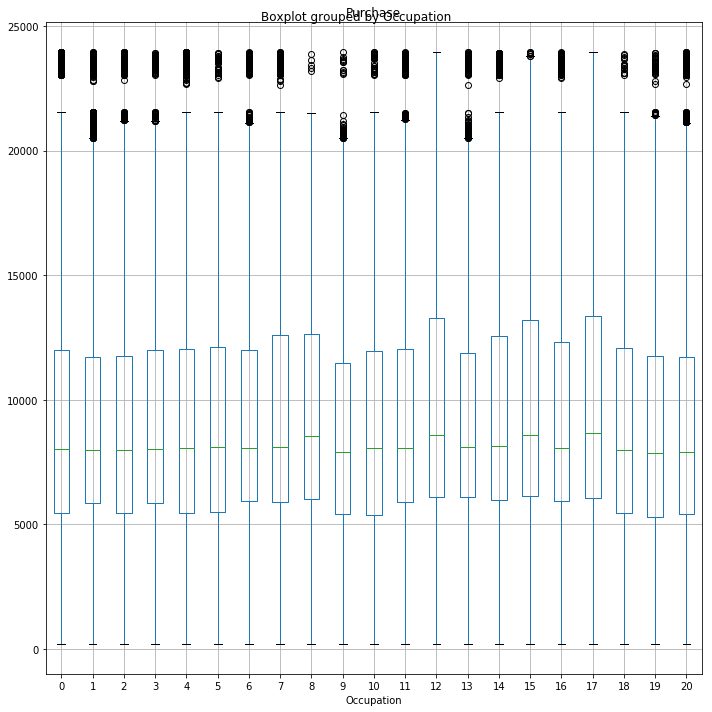

In [14]:
df.boxplot(column='Purchase', by='Occupation', figsize=(10,10))
plt.tight_layout()

In [15]:
df1=pd.get_dummies(df['City_Category'])
df = pd.concat([df,df1], axis=1)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,1000001,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,1,0,0
1,1000001,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,1,0,0
3,1000001,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,1,0,0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969,0,0,1


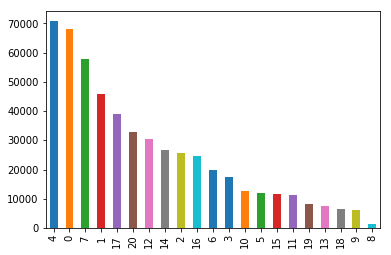

In [16]:
df=df.drop(['City_Category'], axis=1)
df['Occupation'].value_counts().plot(kind='bar')

In [17]:
df['Occupation_log']=np.log(1+df['Occupation'])

In [19]:
df['Product_ID']=df['Product_ID'].apply(lambda x: x[1:])
df['Product_ID'] = df['Product_ID'].apply(lambda x: float(x))
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].median())
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].median())
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')
df['Age'] = df['Age'].apply(lambda x: int(x))
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x: int(x))

In [20]:
from sklearn.model_selection import train_test_split
X=[df['User_ID'],df['Product_ID'],df['Gender'],df['Age'], df['Stay_In_Current_City_Years'],df['Marital_Status'],df['Product_Category_1'], df['Product_Category_2'], df['Product_Category_3'], df['A'], df['B'],df['C'], df['Occupation_log']]
y=df['Purchase']
X=np.array(X)
X=X.transpose()
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE
import math
ridgereg = Ridge(normalize=True)
ridgereg.fit(X_train, y_train)
y_pred_ridge = ridgereg.predict(X_test)
print(math.sqrt(MSE(y_pred_ridge, y_test)))

4751.486584670815


In [22]:
from sklearn.linear_model import Lasso
lassoreg = Lasso()
lassoreg.fit(X_train, y_train)
y_pred_lass = lassoreg.predict(X_test)
print(math.sqrt(MSE(y_pred_lass, y_test)))

4687.172857608421


In [23]:
from sklearn.linear_model import ElasticNet
elasnet = ElasticNet()
elasnet.fit(X_train, y_train)
y_pred_elas = elasnet.predict(X_test)
print(math.sqrt(MSE(y_pred_elas, y_test)))

4694.368225743072


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
y_pred_regr = regr.predict(X_test)
print(math.sqrt(MSE(y_pred_regr, y_test)))

4112.743654227627


In [25]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_test)
print(math.sqrt(MSE(y_pred_xgb, y_test)))

2928.3808324787124


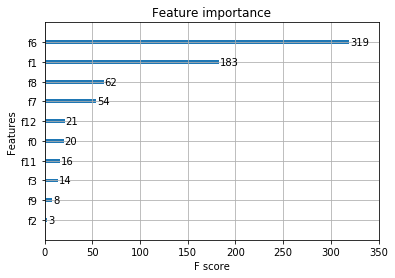

In [26]:
from xgboost import plot_importance
from matplotlib import pyplot
model_xgb.fit(X_train,y_train)
plot_importance(model_xgb)
pyplot.show()

In [27]:
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor()
etr.fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print(math.sqrt(MSE(y_pred_etr, y_test)))

3785.481546177499


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),n_estimators=300)
regr_2.fit(X_train, y_train)
y_pred_ada = regr_2.predict(X_test)
print(math.sqrt(MSE(y_pred_ada, y_test)))

3240.693155308426


In [31]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
mlp.fit(X_train, y_train) 
y_pred_mlp = mlp.predict(X_test)
print(math.sqrt(MSE(y_pred_mlp, y_test)))

4601.062676780643


In [29]:
!pip install -U mlens
from mlens.ensemble import BlendEnsemble
ensemble = BlendEnsemble()
ensemble= ensemble.add([model_xgb,regr_2])
ensemble= ensemble.add_meta(model_xgb)
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print(math.sqrt(MSE(y_pred_ensemble, y_test)))

[MLENS] backend: threading


2889.870350556758


In [30]:
def build_ensemble(proba):
    ensemble = BlendEnsemble()
    ensemble= ensemble.add([xgb.XGBRegressor(probability=proba),regr_2])
    ensemble= ensemble.add_meta(model_xgb)
    ensemble.fit(X_train, y_train)
    y_pred_ensemble = ensemble.predict(X_test)
    print(math.sqrt(MSE(y_pred_ensemble, y_test)))
build_ensemble(proba=True)

2895.1995672289195


***Blended Ensemble of XGBoost and Adaboost (without Probability Considerations) gives least RMSE of 2889.87 among the ones considered: Regularized linear regression (Lasso, ElasticNet, Ridge), Random Forest, Adaboost, XGBoost, Multilayer Perceptron and Extra Trees Regressors and blended ensembles (with and without probability considerations). It may be possible to further reduce the RMSE value using Stacked Ensemble of many layers and including Neural Networks in the same, followed by hyperparameter optimization of all included models using RandomSearchCV or GridSearchCV.***